In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device_name = 'cuda:1'
#name = "edm_bs16_do10_cgt10_cg2_ns50_norm"
name = "edm_bs16_do0_cgt20_cg3_ns30_lr1e-3_0_e40_ed999"
#name = "edm_bs16_do10_cgt10_cg1_ns30_norm"
cfg_scale = 2
noise_steps = 30
epoch = 40


#-------------------------------------------------------------
test_data_path = "../data/val_data_stg7_clipped.csv"
#test_data_path = "../data/for_testing_100.csv"
predictions_path = "predictions/edm_bs16_do0_cgt20_cg3_ns30_lr1e-3_0_e40_ed999/preds_epoch40_cfg2_test_data.csv"
model_path = "models/" + name + "/ema_ckpt" + str(epoch) + ".pt"

In [3]:
def str_to_float_list(s):
    return np.array(list(map(float, s.strip('[]').split(','))))


In [4]:
df_preds = pd.read_csv(predictions_path)
df_preds.head()

,x_real,cond_vectors,predictions
0,"0.0,0.0,0.0,6.81,10.17,0.0,0.74,0.0,3.6,6.82,5...","0.1299,-0.7678,0.2274,-1.4864,-1.0,-1.0,-0.351...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...."
1,"0.0,0.0,0.0,6.81,6.17,0.0,1.74,3.86,0.0,5.82,5...","0.1299,-0.7678,0.2274,-1.4563,-1.0,-1.0,-0.351...","2.6039958,3.3537624,2.8488278,3.7228706,3.6450..."
2,"0.77,0.0,0.0,5.81,6.17,0.0,1.74,0.86,0.0,5.82,...","0.1299,-0.7678,0.2165,-1.4203,-1.0,-1.0,-0.351...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...."
3,"0.0,0.0,0.0,2.81,4.17,0.0,6.74,1.86,0.6,8.82,7...","0.1299,-0.7678,0.2165,-1.4203,-1.0,-1.0,-0.351...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...."
4,"0.77,0.0,1.02,10.81,9.17,0.0,3.74,1.86,0.0,5.8...","0.1299,-0.7678,0.2061,-1.4203,-1.0,-1.0,-0.351...","4.5259595,3.184855,4.231882,4.962909,5.208671,..."


In [5]:
x_real = np.array([str_to_float_list(row) for row in df_preds['x_real']])
cond_vectors = np.array([str_to_float_list(row) for row in df_preds['cond_vectors']])
predictions = np.array([str_to_float_list(row) for row in df_preds['predictions']])

In [6]:
wavelengths = np.load('../data/wavelengths.npy')

In [22]:
def create_2d_spectrogram(wavelengths,
                          intensities,
                          label="2D Spectrogram (Intensity vs Wavelength and Time)"):
    """
    Create and display a 2D spectrogram: each row is a spectrum over wavelength.

    Parameters:
        wavelengths (numpy.ndarray): 1D array of wavelength values.
        intensities (numpy.ndarray): 2D array [time, wavelength] where each row is one spectrum.

    Returns:
        None: Displays the 2D spectrogram.
    """
    # Select the first 1024 spectra sorted in time (assuming already sorted)
    spectra = intensities[0:1024, :]
    
    plt.figure(figsize=(12, 6), dpi=300)
    
    # Display as image: transpose so x-axis is wavelength
    plt.imshow(spectra,
               aspect='auto',
               interpolation='nearest',
               extent=[wavelengths[0], wavelengths[-1], 0, 1024],
               cmap='viridis',
               origin='lower')
    
    plt.colorbar(label='Intensity')
    plt.xlabel('Wavelength', fontsize=18)
    plt.ylabel('Spectrum Index (Time)', fontsize=18)
    plt.title(label, fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.show()

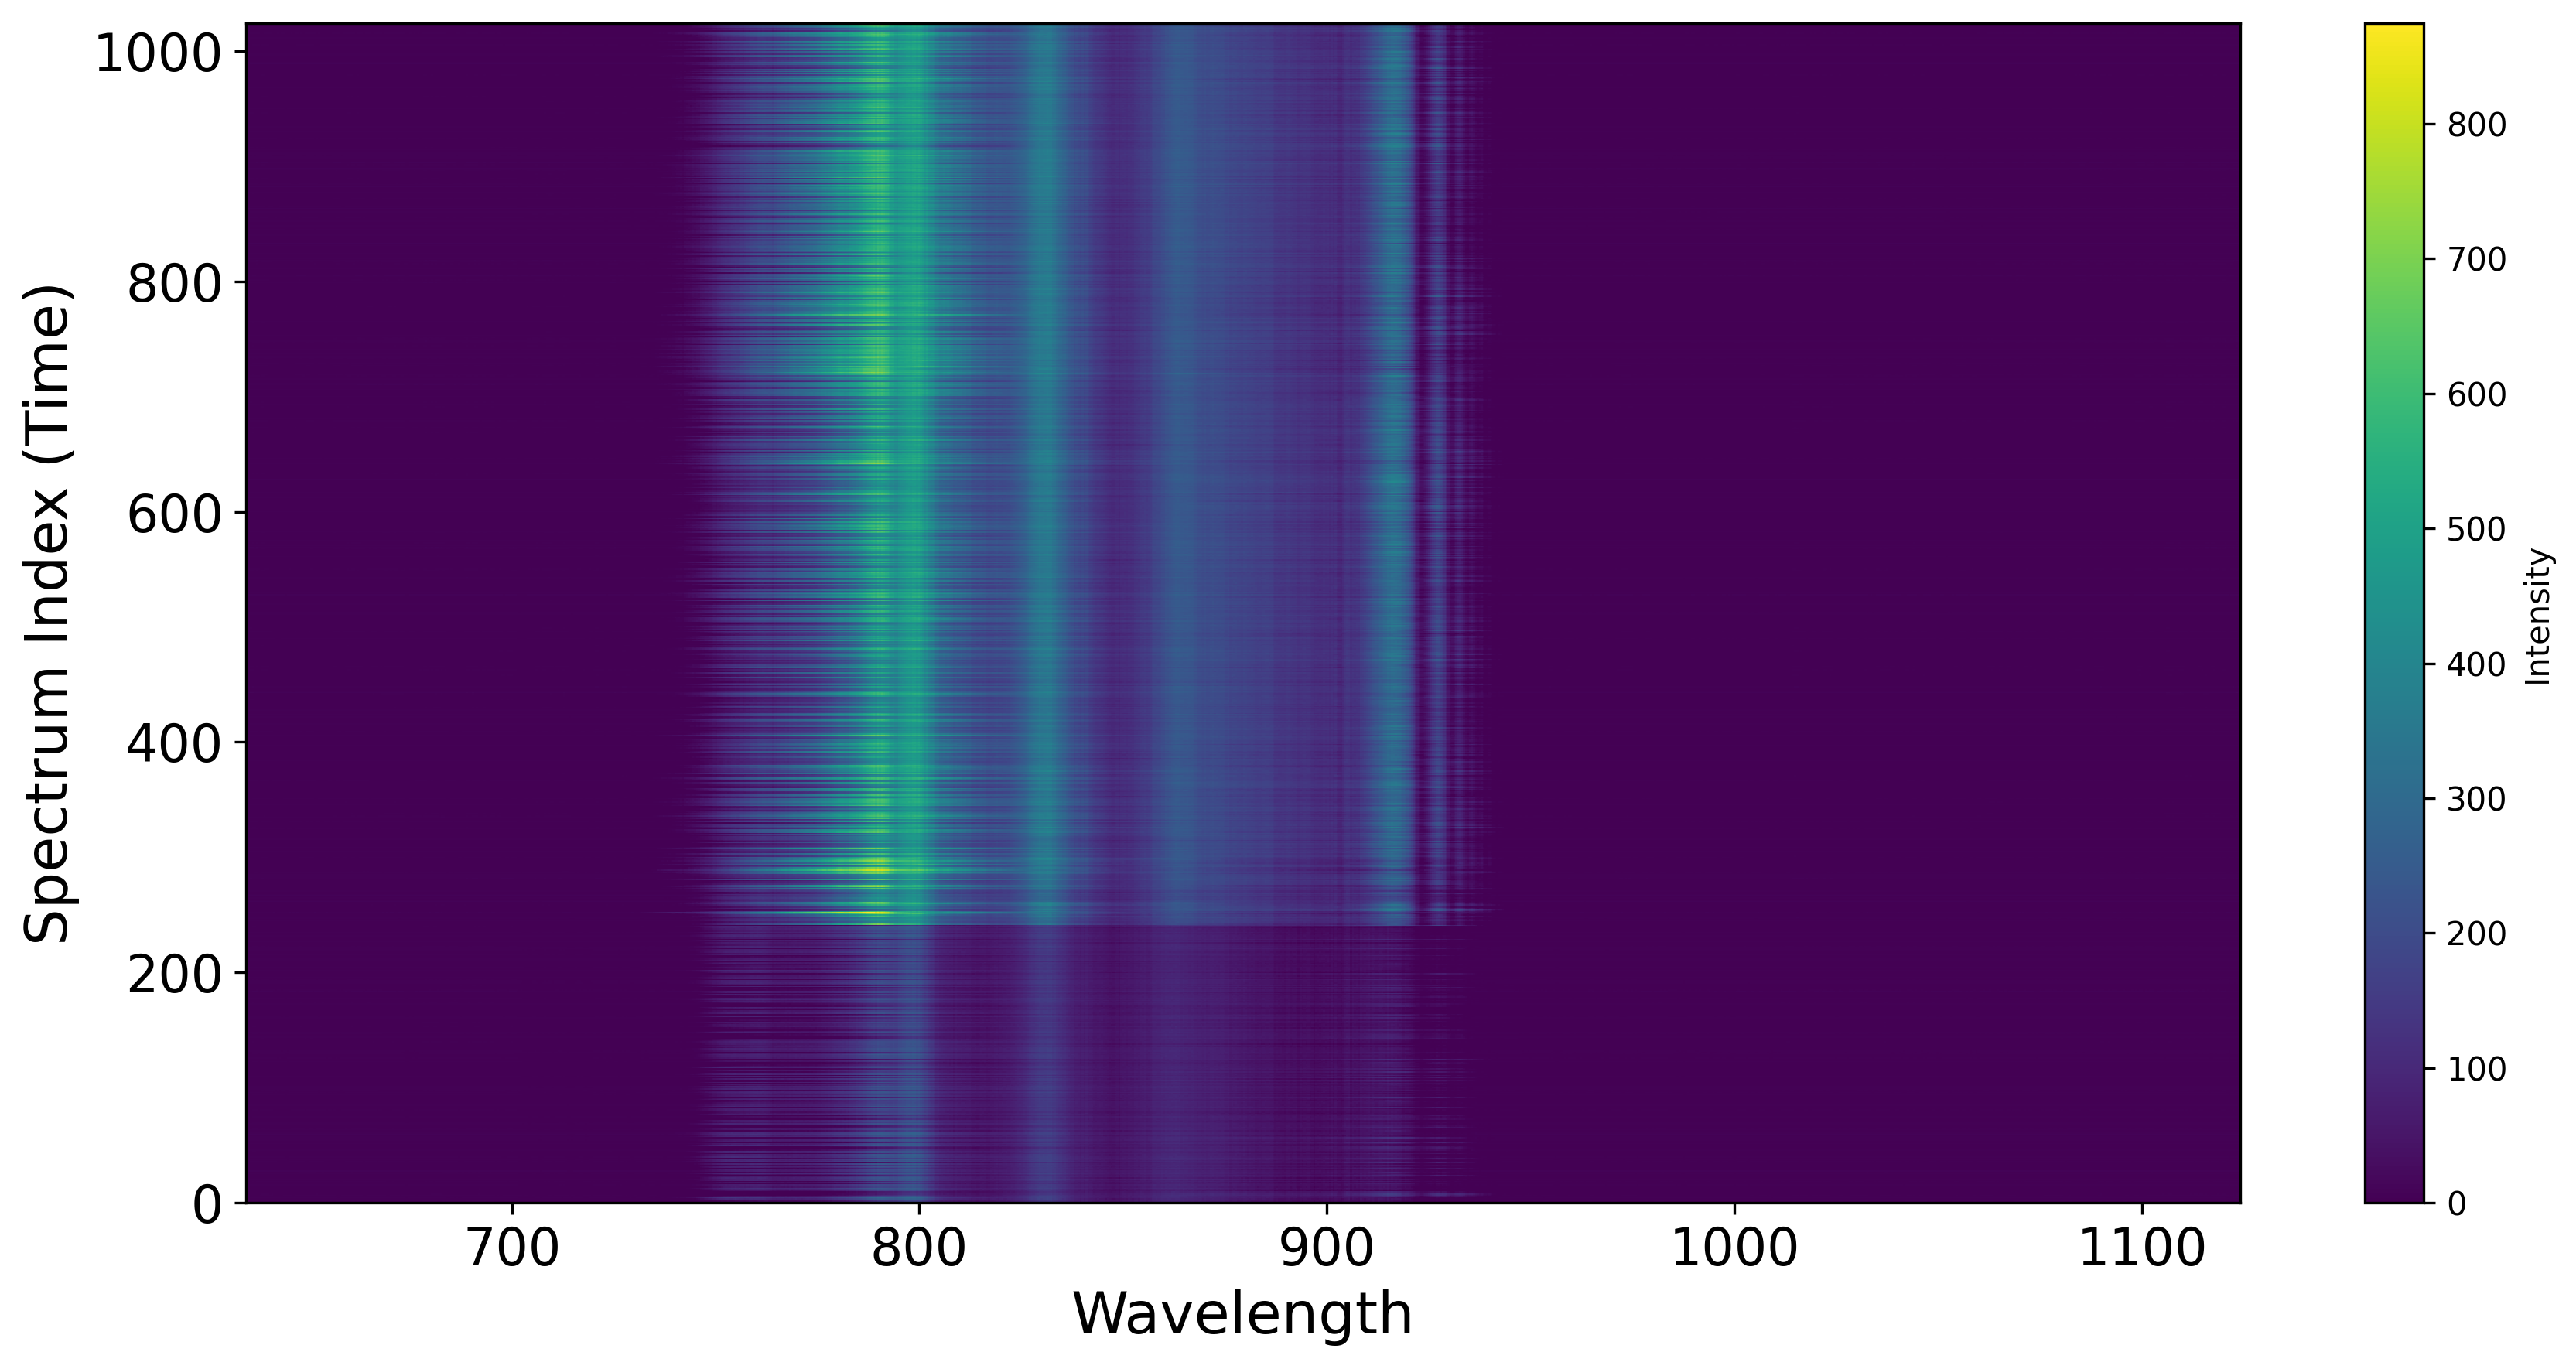

In [23]:
create_2d_spectrogram(wavelengths,
                          predictions,
                          label="")